### [ 산점도 - 버블 그래프 ]
- 두개의 컬럼(변수)의 관계를 시각화해서 표현
- 연속형(수치형) 데이터에 사용함

In [1]:
# [1] 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# [2] 데이터 준비 
file=r'C:\KDT\EX_PANDAS06\DAY04\auto_mpg.csv'

In [3]:
# [3] CSV => DataFrame으로 저장
dataDF=pd.read_csv(file)

In [4]:
# - 컬럼별 타입 확인
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
# [4] 연비와 관련이 높은 컬럼 즉, 변수확인
# - [4-1] 상관계수 확인
cor=dataDF.corr(numeric_only=True)['mpg']

In [6]:
# - [4-2] 시각화
plt.scatter(dataDF.['mpg'],dataDF['weight'],label=f'corr :{round(cor["weight"],2)}')
#plt.scatter(dataDF.mpg,dataDF.weight,label=f'corr :{round(cor["weight"],2)}')  <<R가능
plt.xlabel('mpg')
plt.ylabel('weight')
plt.legend()

SyntaxError: invalid syntax (206874064.py, line 2)

In [ ]:
cor

mpg             1.000000
cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
acceleration    0.420289
model year      0.579267
origin          0.563450
Name: mpg, dtype: float64

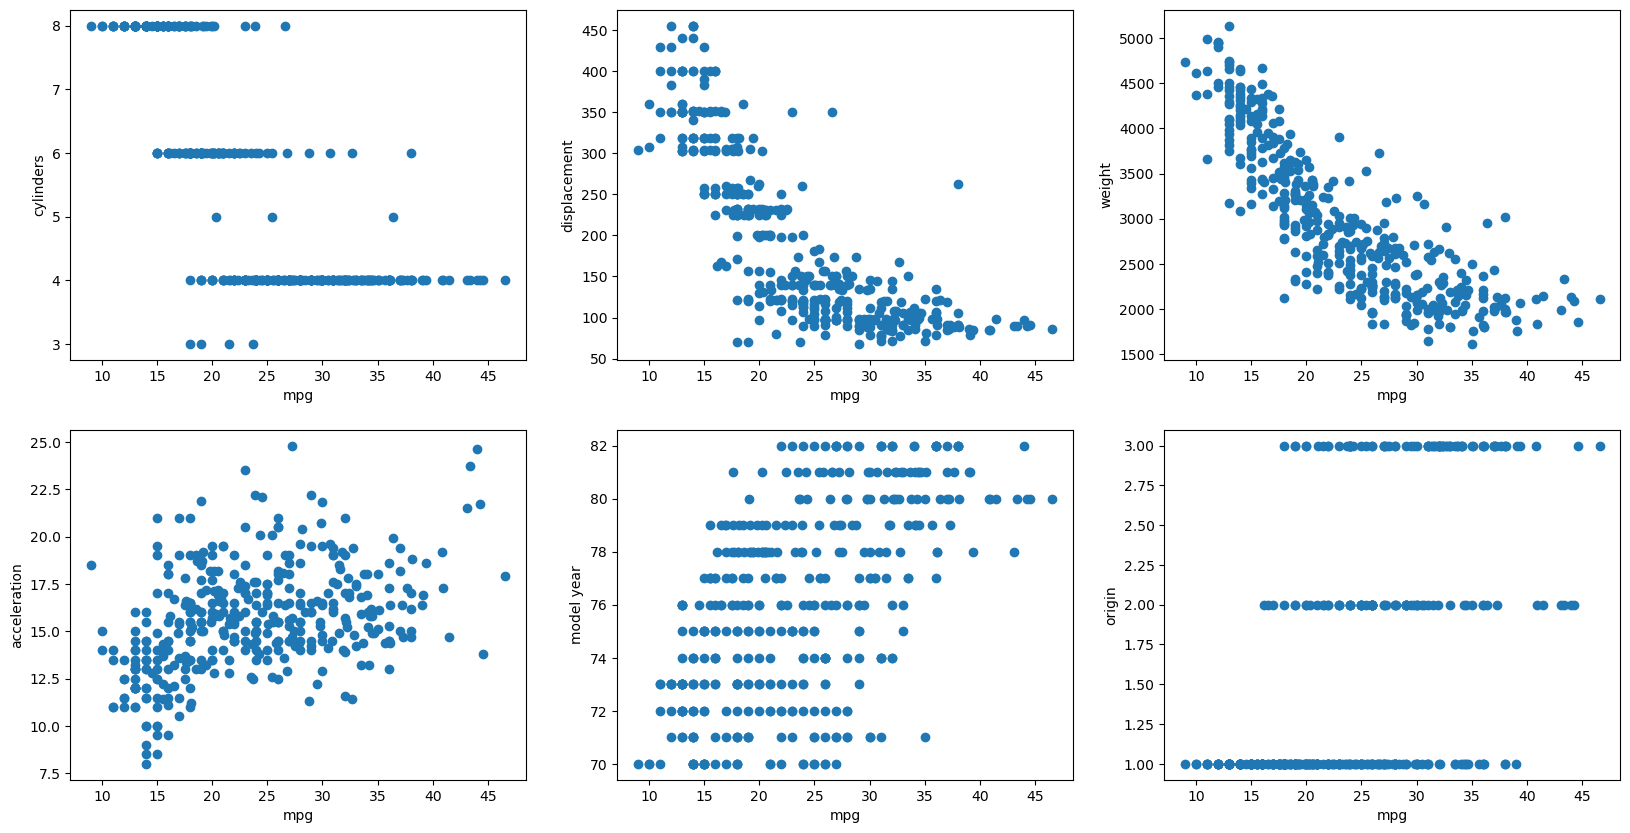

In [ ]:
# - [4-3] mpg 컬럼과 다른 컬럼과의 관계 시각화 
fig=plt.figure(figsize=(20,10))
ax=fig.subplots(2,3)
ax
for i in range(6):
        ax[i//3,i%3].scatter(dataDF['mpg'],dataDF[cor.index[i+1]])
        ax[i//3,i%3].set(xlabel='mpg',ylabel=cor.index[i+1])



Text(0.5, 0.98, '[mpg & cloumns]')

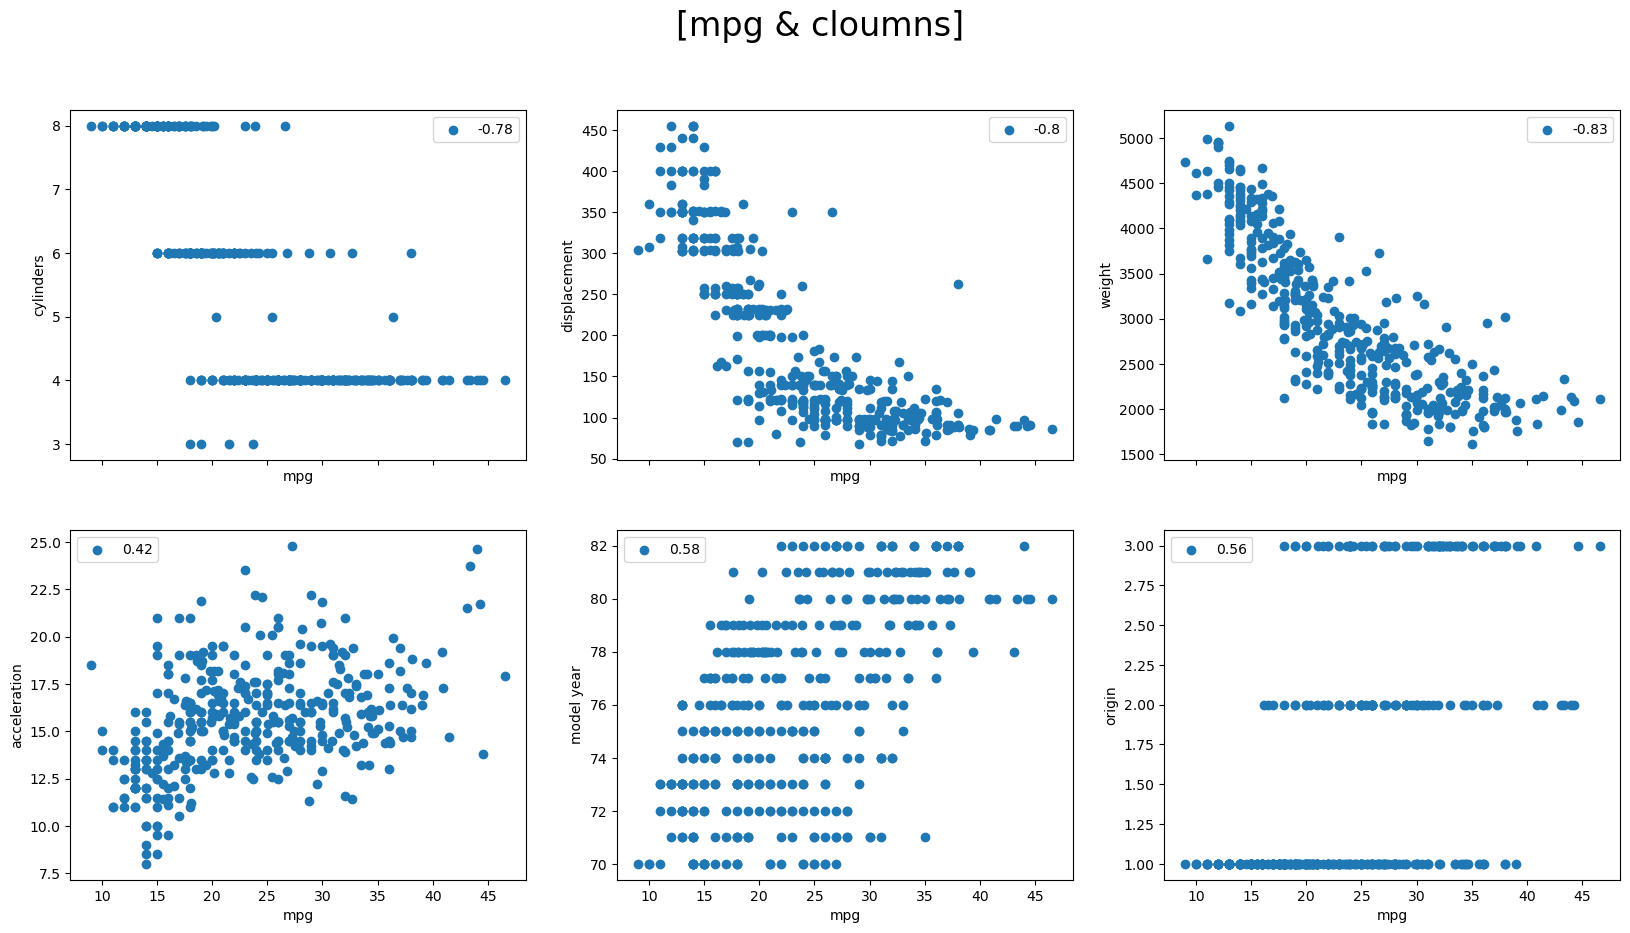

In [ ]:
## 강사님 코드
# - (1) 그래프 담을 창 생성
fig=plt.figure(figsize=(20,10))

# -(2) 그래프 담을 공간 생성 axes
axs=fig.subplots(2,3,sharex=True)
for row in range(2):
    for col in range(3):
        axs[row,col].scatter(dataDF['mpg'],dataDF[cor.index[3*row+col+1]],label=round(cor.iloc[3*row+col+1],2))
        axs[row,col].set_xlabel('mpg')
        axs[row,col].set_ylabel(cor.index[3*row+col+1])
        axs[row,col].legend()
fig.suptitle("[mpg & cloumns]",fontsize=24)

- [5] 연비와 무게, 실린더 수의 관계 시각화
    - 연비와 무게 반비례, 상관관계가 높음
    - 연비와 실린더 개수도 반비례 관계

In [20]:
dataDF['cylinders'].value_counts()

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

Text(0, 0.5, 'weight')

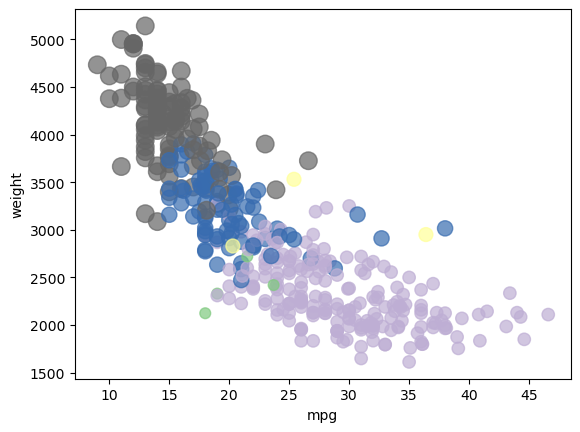

In [44]:
# - mpg와 weight 관계 산점도(scatter 시각화)
plt.scatter(dataDF['mpg'],dataDF['weight'],s=dataDF['cylinders']*20,c=dataDF['cylinders'],alpha=0.7,cmap='Accent')
plt.xlabel('mpg')
plt.ylabel('weight')